In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
MY_BOUNDED_SET = 40000

num_input = 3
num_output = 3

num_hidden1 = 16
num_hidden2 = 16

N_EPOCHS = 2000
epoch = 0
train_rmse_list = []
test_rmse_list = []

session = tf.Session()

In [3]:
x = tf.placeholder(tf.float32, shape=[None, num_input])

y_true = tf.placeholder(tf.float32, shape=[None, num_output], name='y_true')
y_pred = tf.placeholder(tf.float32, shape=[None, num_output])

In [4]:
data_csv = pd.read_csv('../data.csv')
X = data_csv[['in1','in2','in3']]
y = data_csv[['out1','out2','out3']]
#X, y

In [5]:
X_train_pd = X[:MY_BOUNDED_SET]
X_test_pd = X[MY_BOUNDED_SET:]
y_train_pd = y[:MY_BOUNDED_SET]
y_test_pd = y[MY_BOUNDED_SET:]

X_train = X_train_pd.values
X_train = X_train.astype(np.float32)

y_train = y_train_pd.values
y_train = y_train.astype(np.float32)

X_test = X_test_pd.values
X_test = X_test.astype(np.float32)

y_test = y_test_pd.values
y_test = y_test.astype(np.float32)

print (X_train.shape, y_train.shape,X_test.shape,y_test.shape)

(40000, 3) (40000, 3) (12949, 3) (12949, 3)


In [6]:
# Evaluation
#rmse_a = tf.placeholder(tf.float32, [None, 3])
#rmse_b = tf.placeholder(tf.float32, [None, 3])
#rmse = tf.reduce_mean(tf.square(rmse_a - rmse_b))
rmse_a = []
pred_list = []

In [7]:
def cost_func(layer, my_y_true):
    ret = tf.sqrt(tf.reduce_mean(tf.square(layer - my_y_true)))
    #print (layer , my_y_true)
    #ret = tf.reduce_mean(tf.square(layer))
    return ret
            

In [8]:
type(X_train), type(y_train)

(numpy.ndarray, numpy.ndarray)

In [9]:
y_train

array([[ 1.39187e-07,  1.11747e-07, -1.86945e-07],
       [ 4.01196e-06,  3.23639e-06, -5.45397e-06],
       [ 2.49581e-05,  2.02810e-05, -3.48000e-05],
       ...,
       [-9.47092e-01,  6.11797e-02, -3.15031e-01],
       [-9.46749e-01,  5.44199e-02, -3.17297e-01],
       [-9.46361e-01,  4.76586e-02, -3.19532e-01]], dtype=float32)

In [10]:
X_train

array([[0.0827067, 0.740974 , 0.36644  ],
       [0.0827297, 0.740762 , 0.365998 ],
       [0.082753 , 0.74055  , 0.365552 ],
       ...,
       [0.904299 , 0.472788 , 0.346908 ],
       [0.902748 , 0.471081 , 0.340883 ],
       [0.901134 , 0.469546 , 0.334878 ]], dtype=float32)

In [11]:
# Neural Network Structure
inputs = X_train

# Input Layer
input_layer = tf.Variable(inputs)

# Hidden Layer #1
h1 = tf.layers.dense(inputs=input_layer, 
                     units=num_hidden1,
                     use_bias=True,
                     activation=tf.nn.relu)
   
# Hidden Layer #2
h2 = tf.layers.dense(inputs=h1, 
                     units=num_hidden2,
                     use_bias=True,
                     activation=tf.nn.relu)
    
# Output Layer
output_layer = tf.layers.dense(inputs=h2, 
                     units=num_output,
                     use_bias=True,
                     activation=None)


In [12]:
cost = cost_func(output_layer,y_true)
output_layer

<tf.Tensor 'dense_3/BiasAdd:0' shape=(40000, 3) dtype=float32>

In [13]:
optimizer = tf.train.AdamOptimizer(learning_rate=1e-4).minimize(cost)

In [14]:
session.run(tf.global_variables_initializer())

In [15]:
#print (session.run(tf.subtract(output_layer,y_true)).shape)
#print (X_train.shape)

In [16]:
print (y_true.shape)

(?, 3)


In [17]:
def train(N_EPOCHS):
    #global epoch
    global rmse_a
    global pred_list
    #global pred1,pred2,pred3
    for i in range(epoch, epoch + N_EPOCHS):
        feed_dict_train = {x: X_train,
                      y_true: X_train}

        
        session.run(optimizer, feed_dict=feed_dict_train)
        #epoch+=1
        cost_error = session.run(cost,feed_dict=feed_dict_train)
        #print ("[" +str(i+1) +"]")
        print ("Train Accuracy : " , cost_error)
        
        rmse_a += [cost_error]
        #pred_list += [session.run(output_layer,feed_dict=feed_dict_train)]

In [18]:
def predict():
    session.run(tf.global_variables_initializer())
    feed_dict_test = {x: X_test,
                    y_true:y_test}
    print ("Test Accuracy : " , session.run(cost,feed_dict=feed_dict_test))

In [19]:
train(N_EPOCHS)
#predict()
#output_layer

Train Accuracy :  0.5621776
Train Accuracy :  0.5616365
Train Accuracy :  0.5610964
Train Accuracy :  0.5605573
Train Accuracy :  0.56001955
Train Accuracy :  0.559483
Train Accuracy :  0.5589478
Train Accuracy :  0.55841386
Train Accuracy :  0.55788136
Train Accuracy :  0.55735016
Train Accuracy :  0.5568203
Train Accuracy :  0.5562918
Train Accuracy :  0.55576473
Train Accuracy :  0.5552391
Train Accuracy :  0.55471504
Train Accuracy :  0.5541926
Train Accuracy :  0.5536718
Train Accuracy :  0.55315244
Train Accuracy :  0.5526347
Train Accuracy :  0.55211854
Train Accuracy :  0.551604
Train Accuracy :  0.55109096
Train Accuracy :  0.5505795
Train Accuracy :  0.55006945
Train Accuracy :  0.549561
Train Accuracy :  0.549054
Train Accuracy :  0.5485484
Train Accuracy :  0.54804426
Train Accuracy :  0.54754144
Train Accuracy :  0.5470399
Train Accuracy :  0.5465397
Train Accuracy :  0.54604083
Train Accuracy :  0.54554325
Train Accuracy :  0.5450469
Train Accuracy :  0.54455185
Train Acc

Train Accuracy :  0.4206062
Train Accuracy :  0.42002606
Train Accuracy :  0.41944465
Train Accuracy :  0.41886193
Train Accuracy :  0.41827795
Train Accuracy :  0.41769266
Train Accuracy :  0.41710615
Train Accuracy :  0.4165183
Train Accuracy :  0.4159292
Train Accuracy :  0.4153388
Train Accuracy :  0.41474712
Train Accuracy :  0.41415408
Train Accuracy :  0.41355985
Train Accuracy :  0.41296425
Train Accuracy :  0.4123674
Train Accuracy :  0.41176927
Train Accuracy :  0.41116983
Train Accuracy :  0.41056907
Train Accuracy :  0.409967
Train Accuracy :  0.40936366
Train Accuracy :  0.408759
Train Accuracy :  0.408153
Train Accuracy :  0.40754566
Train Accuracy :  0.406937
Train Accuracy :  0.40632698
Train Accuracy :  0.40571567
Train Accuracy :  0.40510303
Train Accuracy :  0.4044891
Train Accuracy :  0.40387386
Train Accuracy :  0.40325728
Train Accuracy :  0.40263945
Train Accuracy :  0.40202036
Train Accuracy :  0.40140003
Train Accuracy :  0.4007785
Train Accuracy :  0.40015575


Train Accuracy :  0.20818454
Train Accuracy :  0.20754558
Train Accuracy :  0.20690809
Train Accuracy :  0.2062721
Train Accuracy :  0.20563762
Train Accuracy :  0.20500469
Train Accuracy :  0.20437329
Train Accuracy :  0.20374338
Train Accuracy :  0.20311509
Train Accuracy :  0.20248832
Train Accuracy :  0.20186315
Train Accuracy :  0.20123954
Train Accuracy :  0.20061752
Train Accuracy :  0.19999713
Train Accuracy :  0.19937837
Train Accuracy :  0.19876124
Train Accuracy :  0.19814575
Train Accuracy :  0.1975319
Train Accuracy :  0.19691968
Train Accuracy :  0.1963091
Train Accuracy :  0.1957002
Train Accuracy :  0.19509299
Train Accuracy :  0.19448744
Train Accuracy :  0.19388358
Train Accuracy :  0.19328143
Train Accuracy :  0.19268095
Train Accuracy :  0.19208221
Train Accuracy :  0.19148515
Train Accuracy :  0.19088984
Train Accuracy :  0.19029622
Train Accuracy :  0.18970436
Train Accuracy :  0.18911423
Train Accuracy :  0.18852586
Train Accuracy :  0.18793921
Train Accuracy :  

Train Accuracy :  0.08197387
Train Accuracy :  0.08167636
Train Accuracy :  0.08137912
Train Accuracy :  0.08108216
Train Accuracy :  0.08078545
Train Accuracy :  0.08048905
Train Accuracy :  0.080192894
Train Accuracy :  0.07989702
Train Accuracy :  0.07960141
Train Accuracy :  0.07930609
Train Accuracy :  0.07901099
Train Accuracy :  0.078716144
Train Accuracy :  0.07842151
Train Accuracy :  0.07812711
Train Accuracy :  0.07783293
Train Accuracy :  0.077539004
Train Accuracy :  0.07724532
Train Accuracy :  0.07695183
Train Accuracy :  0.07665856
Train Accuracy :  0.076365516
Train Accuracy :  0.07607268
Train Accuracy :  0.07578006
Train Accuracy :  0.07548765
Train Accuracy :  0.07519545
Train Accuracy :  0.07490344
Train Accuracy :  0.07461166
Train Accuracy :  0.074320085
Train Accuracy :  0.07402872
Train Accuracy :  0.073737554
Train Accuracy :  0.07344659
Train Accuracy :  0.0731558
Train Accuracy :  0.0728652
Train Accuracy :  0.07257481
Train Accuracy :  0.0722846
Train Accur

Train Accuracy :  0.016186701
Train Accuracy :  0.016069027
Train Accuracy :  0.01595194
Train Accuracy :  0.015835434
Train Accuracy :  0.015719494
Train Accuracy :  0.015604124
Train Accuracy :  0.015489346
Train Accuracy :  0.015375117
Train Accuracy :  0.01526145
Train Accuracy :  0.015148339
Train Accuracy :  0.015035774
Train Accuracy :  0.01492375
Train Accuracy :  0.014812271
Train Accuracy :  0.014701334
Train Accuracy :  0.0145909535
Train Accuracy :  0.014481099
Train Accuracy :  0.014371776
Train Accuracy :  0.014262964
Train Accuracy :  0.014154642
Train Accuracy :  0.01404683
Train Accuracy :  0.013939533
Train Accuracy :  0.01383278
Train Accuracy :  0.013726487
Train Accuracy :  0.013620669
Train Accuracy :  0.013515341
Train Accuracy :  0.013410544
Train Accuracy :  0.013306238
Train Accuracy :  0.013202428
Train Accuracy :  0.0130991535
Train Accuracy :  0.012996349
Train Accuracy :  0.012894035
Train Accuracy :  0.012792178
Train Accuracy :  0.012690807
Train Accurac

Train Accuracy :  0.00042446385
Train Accuracy :  0.00042020483
Train Accuracy :  0.00038435942
Train Accuracy :  0.00036091462
Train Accuracy :  0.00036038843
Train Accuracy :  0.00037348346
Train Accuracy :  0.0003754152
Train Accuracy :  0.0003507851
Train Accuracy :  0.00032515064
Train Accuracy :  0.00031124696
Train Accuracy :  0.0003063459
Train Accuracy :  0.00031241676
Train Accuracy :  0.00033408919
Train Accuracy :  0.00034533686
Train Accuracy :  0.0003146085
Train Accuracy :  0.00028342972
Train Accuracy :  0.00026815286
Train Accuracy :  0.00026297936
Train Accuracy :  0.00027178196
Train Accuracy :  0.00030748956
Train Accuracy :  0.00032163944
Train Accuracy :  0.0002713018
Train Accuracy :  0.00024213086
Train Accuracy :  0.00024063958
Train Accuracy :  0.00027121595
Train Accuracy :  0.00030364728
Train Accuracy :  0.0002549912
Train Accuracy :  0.00022382704
Train Accuracy :  0.00023212009
Train Accuracy :  0.00027430558
Train Accuracy :  0.00026192213
Train Accuracy

Train Accuracy :  0.00020996088
Train Accuracy :  0.0002030598
Train Accuracy :  0.00031140205
Train Accuracy :  0.0001472639
Train Accuracy :  0.00026078508
Train Accuracy :  0.0003669183
Train Accuracy :  0.00020293416
Train Accuracy :  0.00020277603
Train Accuracy :  0.0003090843
Train Accuracy :  0.00014754466
Train Accuracy :  0.00025381197
Train Accuracy :  0.00035835398
Train Accuracy :  0.00019721371
Train Accuracy :  0.00020172796
Train Accuracy :  0.00030620498
Train Accuracy :  0.00014708853
Train Accuracy :  0.0002480676
Train Accuracy :  0.00035109863
Train Accuracy :  0.00019253822
Train Accuracy :  0.00020019618
Train Accuracy :  0.00030299247
Train Accuracy :  0.000146191
Train Accuracy :  0.00024308964
Train Accuracy :  0.00034465236
Train Accuracy :  0.00018850047
Train Accuracy :  0.00019842974
Train Accuracy :  0.0002996879
Train Accuracy :  0.00014510147
Train Accuracy :  0.00023868837
Train Accuracy :  0.00033886082
Train Accuracy :  0.00018493841
Train Accuracy :

In [20]:
#session.run(optimizer, feed_dict=feed_dict_train)

In [21]:
#print (session.run(output_layer))

In [22]:
#print (session.run(cost))

In [23]:
#print (rmse_a)

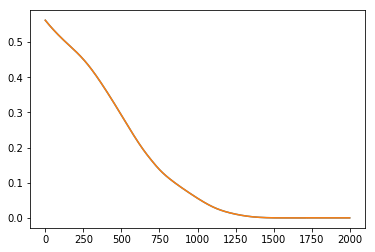

In [24]:
plt.plot(list(enumerate(range(len(rmse_a)))),rmse_a)

In [25]:
#list(enumerate(range(10)))

In [26]:
#print (rmse_a)

In [27]:
print (rmse_a[-1])

0.000121230696


In [28]:
print (pred_list[-1])

IndexError: list index out of range